In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os

# TODO: Fill in the Google Drive path where you uploaded the project folder
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'DeepfakeDetectionModel'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Dataset', 'Code', 'Models', 'resnet.ipynb']


In [5]:
DATASET_FOLDER = os.path.join(GOOGLE_DRIVE_PATH, 'Dataset', 'Dataset_Cropped')
CODE_FOLDER = os.path.join(GOOGLE_DRIVE_PATH, 'Code')
print(os.listdir(DATASET_FOLDER))
print(os.listdir(CODE_FOLDER))

['.DS_Store', 'train', 'test']
['resnet34.py']


In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append(CODE_FOLDER)

In [8]:
from resnet34 import ResNet34

In [9]:
train_dataset_path = os.path.join(DATASET_FOLDER, 'train')

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [12]:
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = torchvision.datasets.ImageFolder(root=train_dataset_path, transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dataset_path, validation_split=0.2, subset="training", seed=123)

Found 2948 files belonging to 3 classes.
Using 2359 files for training.


In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(train_dataset_path, validation_split=0.2, subset="validation", seed=123)

Found 2948 files belonging to 3 classes.
Using 589 files for validation.


In [15]:
model = ResNet34()

In [16]:
criterion = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [17]:
model.compile(optimizer=optimizer, loss=criterion, metrics=['accuracy'])

In [18]:
num_epochs = 100
history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds)

Epoch 1/100
74/74 [==============================] - 486s 5s/step - loss: 8.2599 - accuracy: 0.3429 - val_loss: 72171.9766 - val_accuracy: 0.3497
Epoch 2/100
74/74 [==============================] - 25s 325ms/step - loss: 2.3119 - accuracy: 0.3150 - val_loss: 794.8549 - val_accuracy: 0.3413
Epoch 3/100
74/74 [==============================] - 24s 320ms/step - loss: 1.9458 - accuracy: 0.3332 - val_loss: 39.1811 - val_accuracy: 0.3413
Epoch 4/100
74/74 [==============================] - 25s 322ms/step - loss: 1.4194 - accuracy: 0.3273 - val_loss: 1.5002 - val_accuracy: 0.3209
Epoch 5/100
74/74 [==============================] - 25s 323ms/step - loss: 1.2329 - accuracy: 0.3379 - val_loss: 1.4162 - val_accuracy: 0.3447
Epoch 6/100
74/74 [==============================] - 25s 321ms/step - loss: 1.3378 - accuracy: 0.3353 - val_loss: 1.1688 - val_accuracy: 0.3497
Epoch 7/100
74/74 [==============================] - 24s 320ms/step - loss: 1.1625 - accuracy: 0.3366 - val_loss: 1.1067 - val_accu

In [19]:
save_path = os.path.join(GOOGLE_DRIVE_PATH, 'Models')
model.save(os.path.join(save_path, 'resnet34'))

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

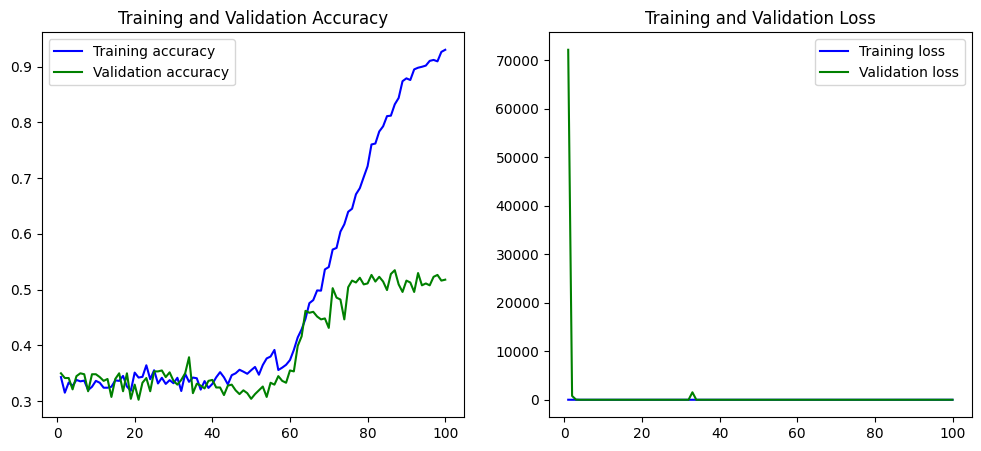

In [24]:
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()